In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as pdr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor





In [46]:
plt.style.use("seaborn-v0_8-whitegrid")

In [47]:
pip install scikit-learn

In [48]:
pip install yfinance

## Importing Data from yahoo finance

In [49]:
data = yf.download("AAPL", start="2017-01-01", end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [50]:
print(data)

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2017-01-03   26.827244   26.868819   26.506195   26.746404  115127600
2017-01-04   26.797215   26.910391   26.734853   26.757950   84472400
2017-01-05   26.933491   26.991233   26.748714   26.774120   88774400
2017-01-06   27.233753   27.291496   26.901155   26.972755  127007600
2017-01-09   27.483206   27.584833   27.240688   27.242996  134247600
...                ...         ...         ...         ...        ...
2025-06-02  201.699997  202.130005  200.119995  200.279999   35423300
2025-06-03  203.270004  203.770004  200.960007  201.350006   46381600
2025-06-04  202.820007  206.240005  202.100006  202.910004   43604000
2025-06-05  200.630005  204.750000  200.149994  203.500000   55126100
2025-06-06  203.919998  205.699997  202.050003  203.000000   46539200

[2119 rows x 5 colu

## Descriptive Statistic of Apple staock prices

In [51]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2119.000000,2119.000000,2119.000000,2119.000000,2.119000e+03
mean,116.670914,117.845129,115.361798,116.551617,9.901047e+07
std,65.354465,65.981687,64.631951,65.276760,5.388901e+07
min,26.797215,26.868819,26.506195,26.746404,2.323470e+07
25%,47.659887,47.917363,47.006004,47.518231,6.312975e+07
50%,125.088600,127.014709,123.780754,125.504275,8.669360e+07
75%,169.802277,171.565914,168.474118,169.539768,1.187412e+08
max,258.396667,259.474086,257.010028,257.568678,4.479400e+08


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2119 entries, 2017-01-03 to 2025-06-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2119 non-null   float64
 1   (High, AAPL)    2119 non-null   float64
 2   (Low, AAPL)     2119 non-null   float64
 3   (Open, AAPL)    2119 non-null   float64
 4   (Volume, AAPL)  2119 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 99.3 KB


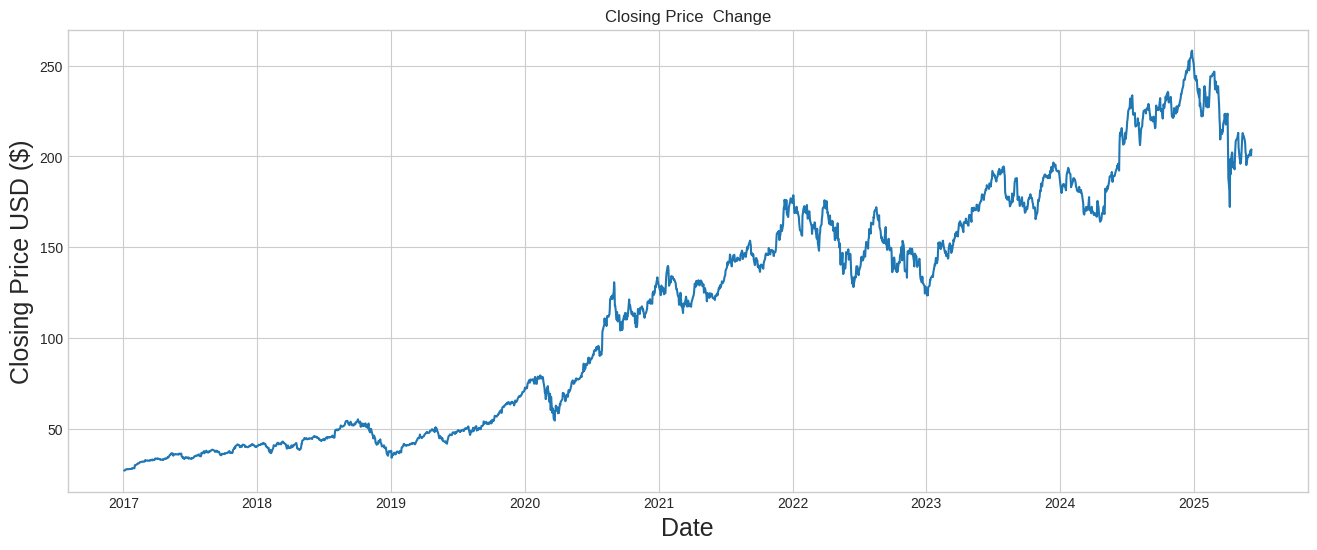

In [53]:
plt.figure(figsize=(16,6))
plt.title("Closing Price  Change")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD ($)", fontsize=18)
plt.show()

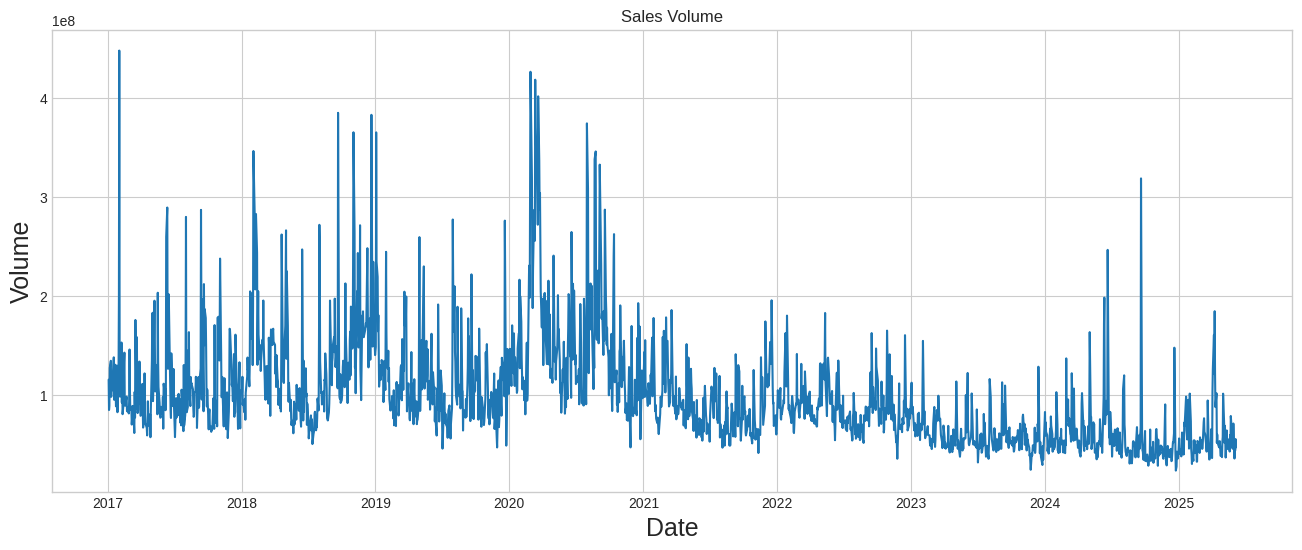

In [54]:
plt.figure(figsize=(16,6))
plt.title("Sales Volume")
plt.plot(data["Volume"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Volume", fontsize=18)
plt.show()

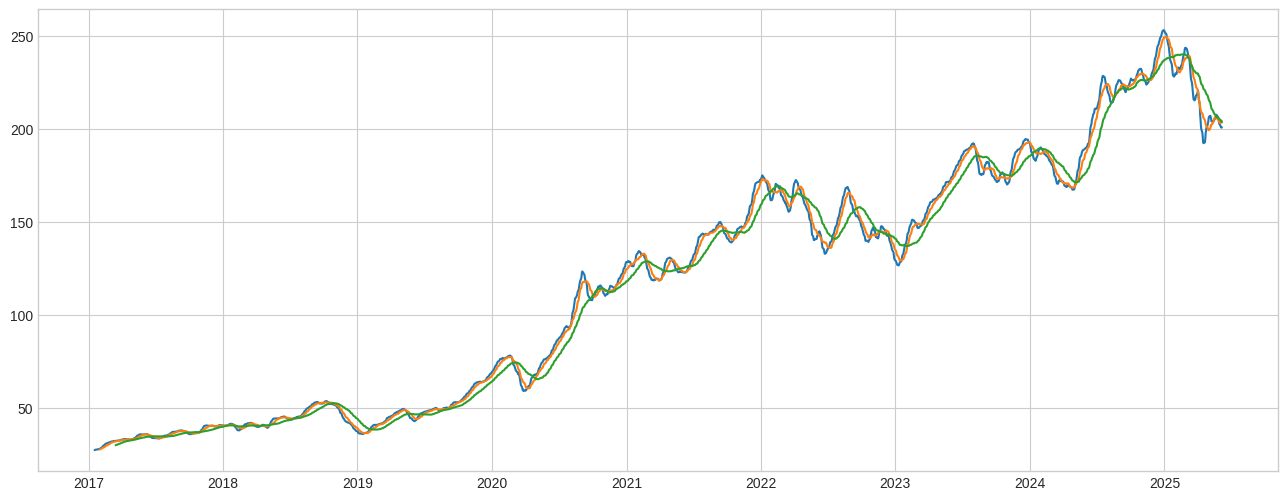

In [55]:
moving_average_1= data.Close.rolling(window=10).mean()
moving_average_2 = data.Close.rolling(window=20).mean()
moving_average_3 = data.Close.rolling(window=50).mean()


plt.figure(figsize=(16,6))
plt.plot(data.index, moving_average_1, label="10 days")
plt.plot(data.index, moving_average_2, label="20 days")
plt.plot(data.index, moving_average_3, label="50 days")


In [56]:
print(data)

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2017-01-03   26.827244   26.868819   26.506195   26.746404  115127600
2017-01-04   26.797215   26.910391   26.734853   26.757950   84472400
2017-01-05   26.933491   26.991233   26.748714   26.774120   88774400
2017-01-06   27.233753   27.291496   26.901155   26.972755  127007600
2017-01-09   27.483206   27.584833   27.240688   27.242996  134247600
...                ...         ...         ...         ...        ...
2025-06-02  201.699997  202.130005  200.119995  200.279999   35423300
2025-06-03  203.270004  203.770004  200.960007  201.350006   46381600
2025-06-04  202.820007  206.240005  202.100006  202.910004   43604000
2025-06-05  200.630005  204.750000  200.149994  203.500000   55126100
2025-06-06  203.919998  205.699997  202.050003  203.000000   46539200

[2119 rows x 5 colu

In [57]:
df = data[['Close']].copy()

print(df)


Price            Close
Ticker            AAPL
Date                  
2017-01-03   26.827244
2017-01-04   26.797215
2017-01-05   26.933491
2017-01-06   27.233753
2017-01-09   27.483206
...                ...
2025-06-02  201.699997
2025-06-03  203.270004
2025-06-04  202.820007
2025-06-05  200.630005
2025-06-06  203.919998

[2119 rows x 1 columns]


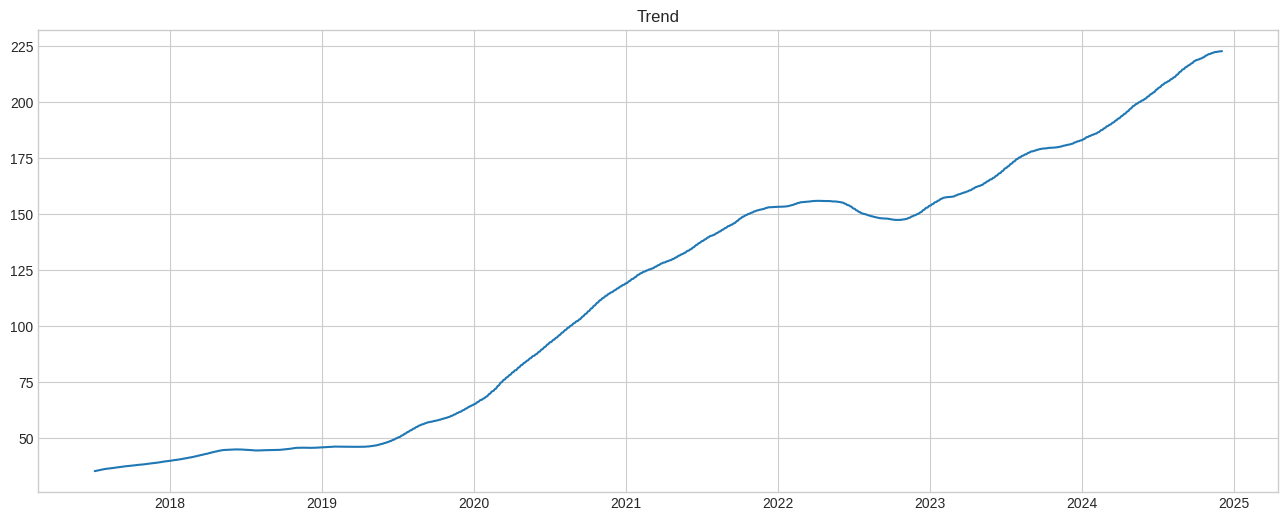

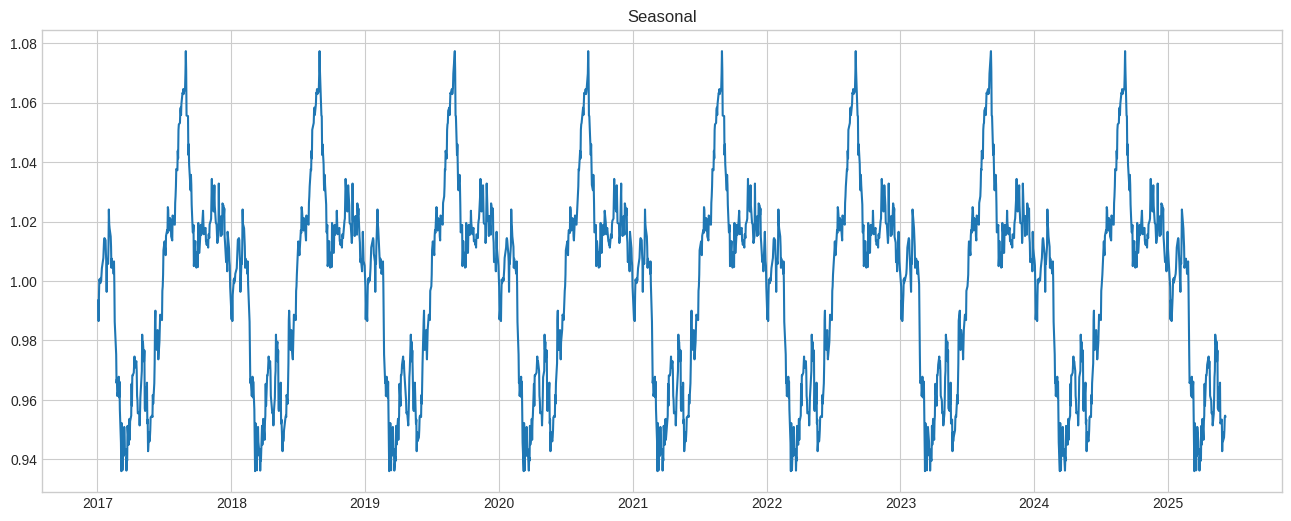

In [58]:
sesonal = seasonal_decompose(df, model='multiplicative',period=252)

trend = sesonal.trend
seasonal = sesonal.seasonal

plt.figure(figsize=(16,6))
plt.plot(trend)
plt.title("Trend")
plt.show()

plt.figure(figsize=(16,6))
plt.plot(seasonal)
plt.title("Seasonal")
plt.show()


##Trend Modeling

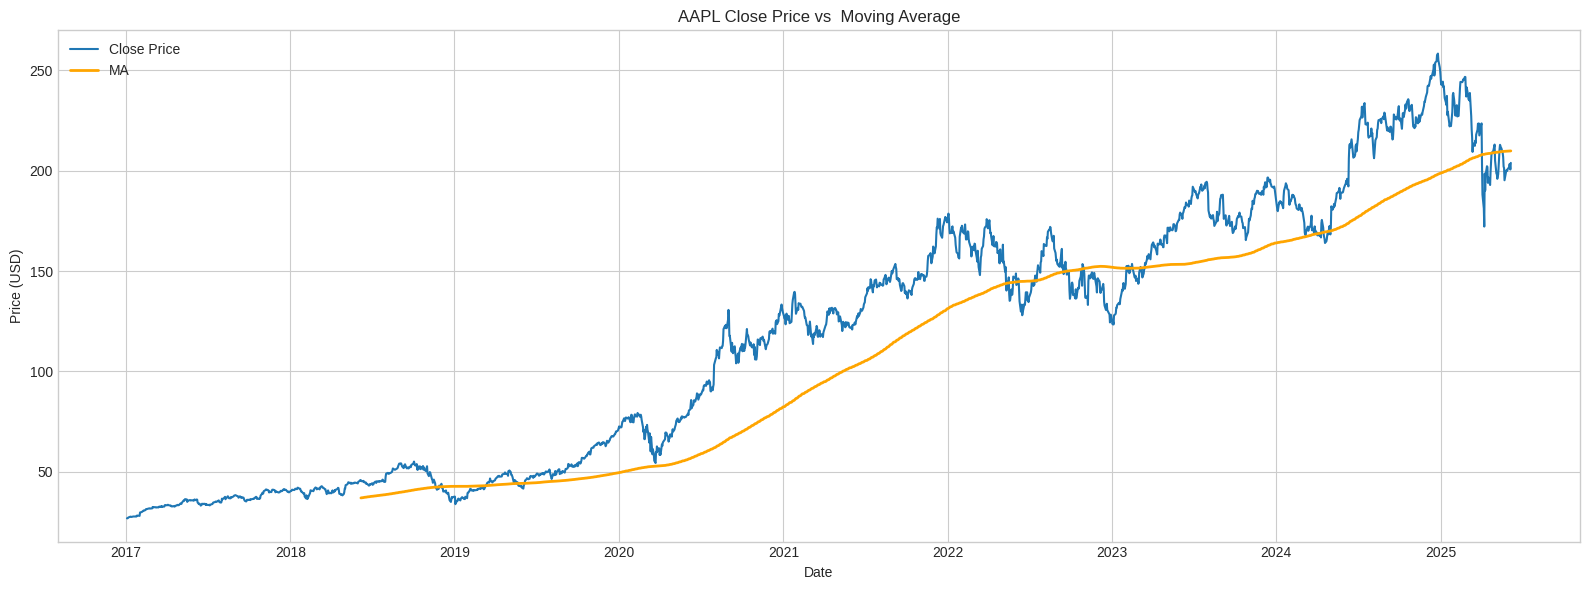

In [59]:
ma_200 = df.Close.rolling(window=360).mean()

plt.figure(figsize=(16,6))
plt.plot(df,label="Close Price",linewidth = 1.5)
plt.plot(ma_200, label="MA",linewidth=2,color = "orange")

plt.title("AAPL Close Price vs  Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [69]:
dp = DeterministicProcess(index=df.index, order=5)

y = df['Close']
X = dp.in_sample()


trend_model= LinearRegression(fit_intercept=True)
trend_model.fit(X, y)
trends = trend_model.predict(X)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


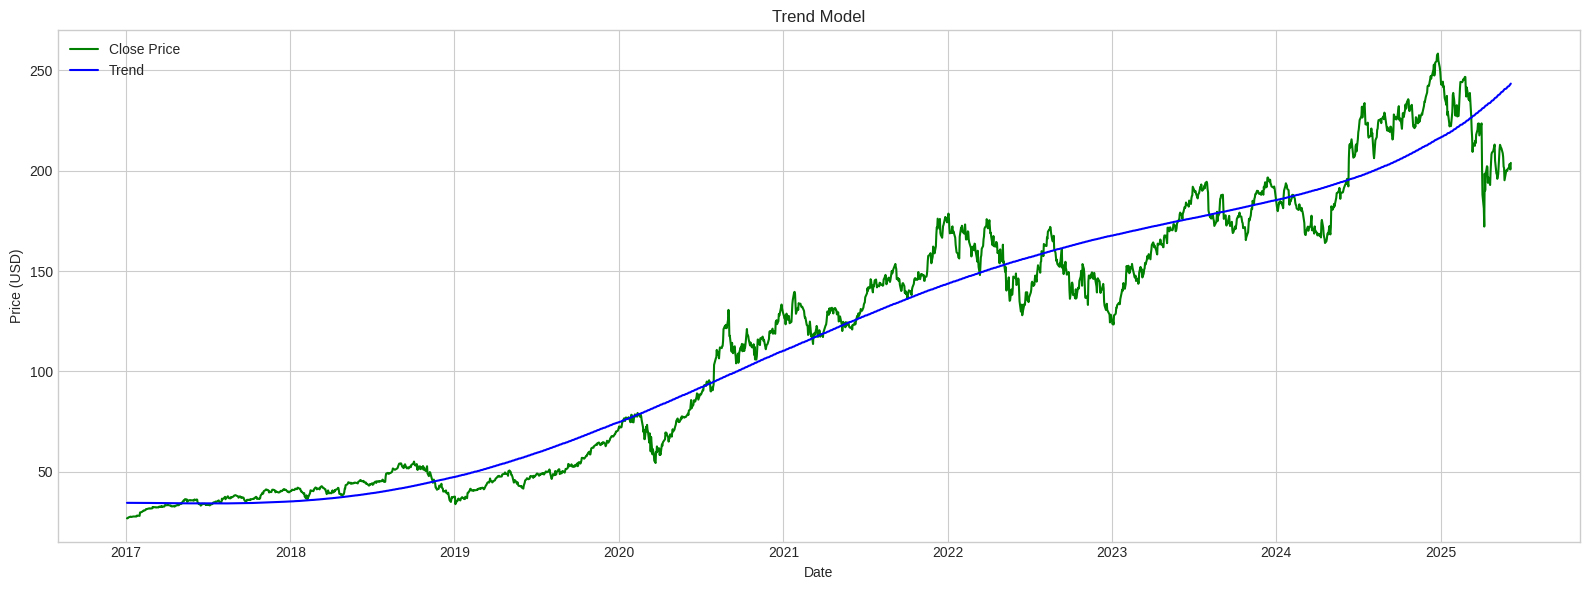

In [71]:
X_fore = dp.out_of_sample(steps=90)
y_fore = trend_model.predict(X_fore)

plt.figure(figsize=(16, 6))
plt.plot(y.index, y, label='Close Price', color='green')
plt.plot(y.index, trends, label='Trend', color='blue')
#plt.plot(y_fore.index, y_fore, label='Forecast (90 days)', color='orange')
plt.title("Trend Model")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

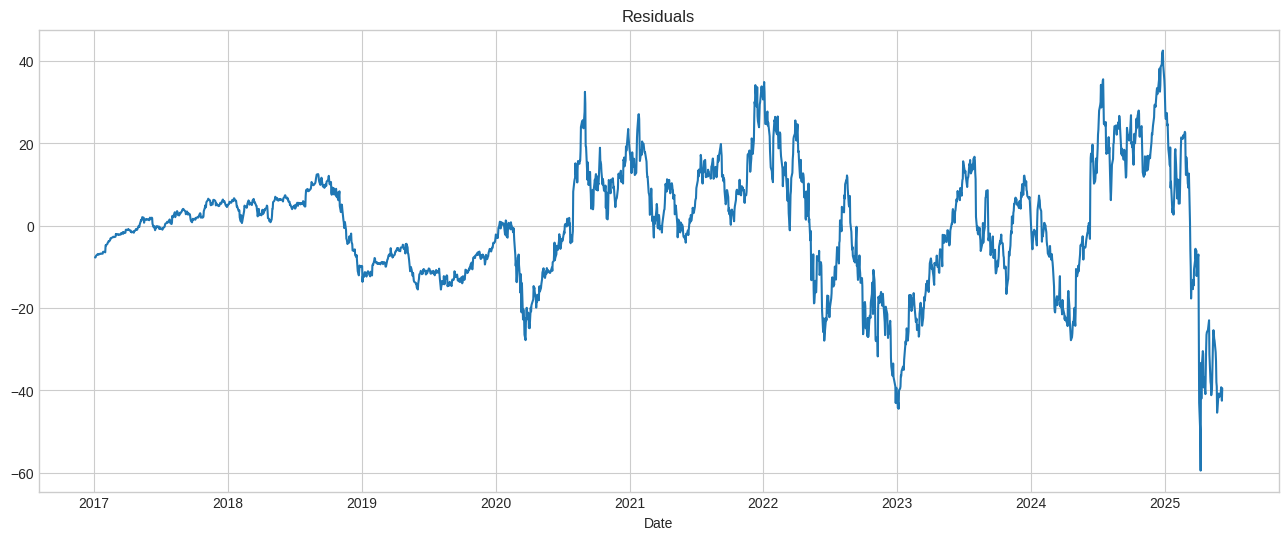

In [74]:
y_res = y - trends
plt.figure(figsize=(16,6))
plt.plot(y.index,y_res)
plt.title("Residuals")
plt.xlabel("Date")
plt.show()

In [77]:
model_2 = XGBRegressor()
model_2.fit(X,y_res)
y_pred = model_2.predict(X)

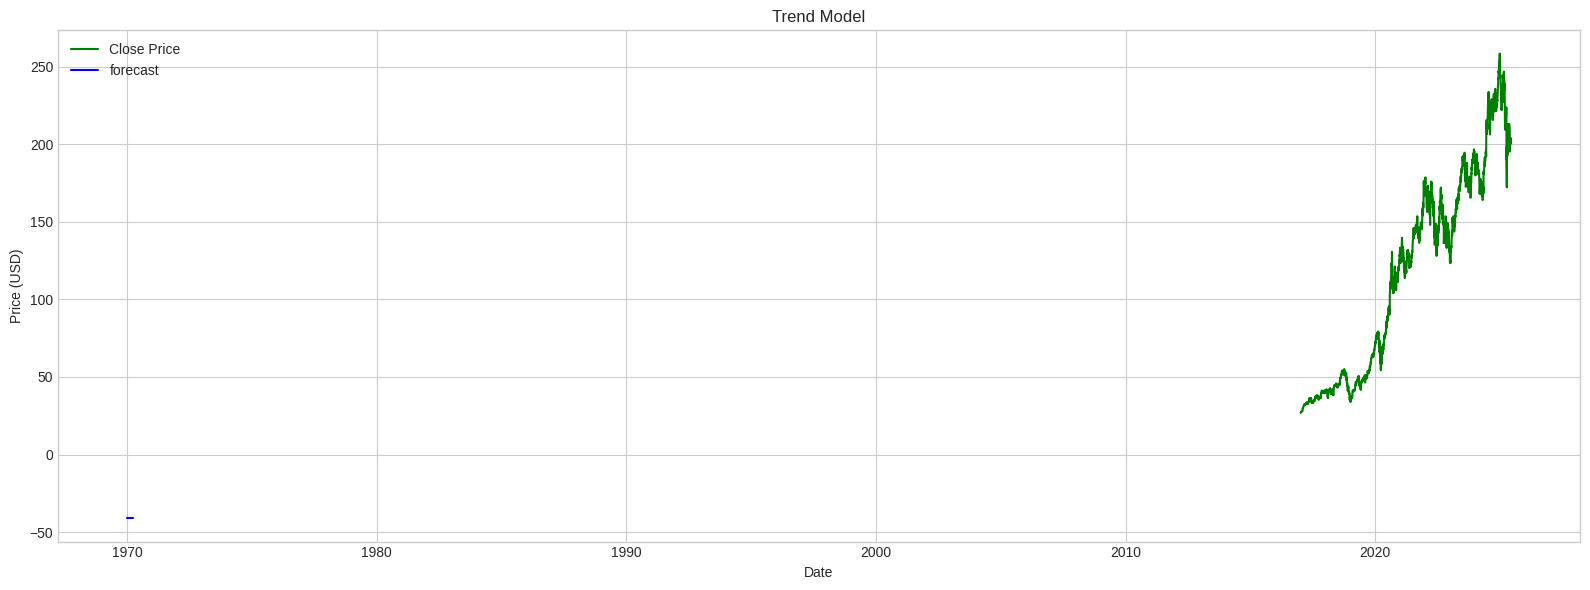

In [82]:
forecast = model_2.predict(X_fore)
plt.figure(figsize=(16, 6))
plt.plot(y.index, y, label='Close Price', color='green')
plt.plot(forecast, label='forecast', color='blue')
plt.title("Trend Model")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()